In [1]:
import sys
import os

sys.path.append(os.path.abspath("../Classifiers"))

from RF_OneHotGeo import * 

In [2]:
import warnings
warnings.filterwarnings( 'ignore' )
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Paths to top30 from GTD data

In [3]:
trains = ['train100', 'train200', 'train300', 'train478']
tests = ['test100', 'test200', 'test300', 'test478', ]
traindir = '../../../../data/top30groups/traindata'
testdir = '../../../../data/top30groups/testdata'

trainpaths = []
testpaths = []
for i, partition in enumerate(trains):
    trainpaths.append(f'{traindir}/{partition}.csv')
    testpaths.append(f'{testdir}/{tests[i]}.csv')

### Training models and computing accuracy

In [4]:
models = []
accuracies = []
predictions = []
truths = []
n = [100, 200, 300, 478]
for i, path in enumerate(trainpaths):
    print(f'Computing for partition {i+1}, balanced classes with {n[i]} entries for each class and one hot encoded geodata')

    # run classifier on data
    rfc, accuracy, y_pred_rfc, labels = main(trainpaths[i], testpaths[i])

    #  saving models, accuracies, predictions, and truths in case we need it for statistics later
    models.append(rfc)
    accuracies.append(accuracy)
    predictions.append(y_pred_rfc)
    truths.append(labels)

    print("---------------------------------------------------")

Computing for partition 1, balanced classes with 100 entries for each class and one hot encoded geodata
Finding optimal hyperparameters...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training best RF classifier...
Making predictions...
Accuracy: 87.33%
---------------------------------------------------
Computing for partition 2, balanced classes with 200 entries for each class and one hot encoded geodata
Finding optimal hyperparameters...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training best RF classifier...
Making predictions...
Accuracy: 87.39%
---------------------------------------------------
Computing for partition 3, balanced classes with 300 entries for each class and one hot encoded geodata
Finding optimal hyperparameters...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training best RF classifier...
Making predictions...
Accuracy: 90.37%
---------------------------------------------------
Computing for partition 4, balance

In [5]:
with open("Results/rf_top30_OneHotGeo.txt", "w") as f:
    for i in range(len(trainpaths)):
        f.write(f"Partition {i+1} - {n[i]} samples per class with one hot encoded geographical features\n")
        f.write(f"Accuracy: {accuracies[i]*100:.2f}%\n")
        f.write("---------------------------------------------------\n")

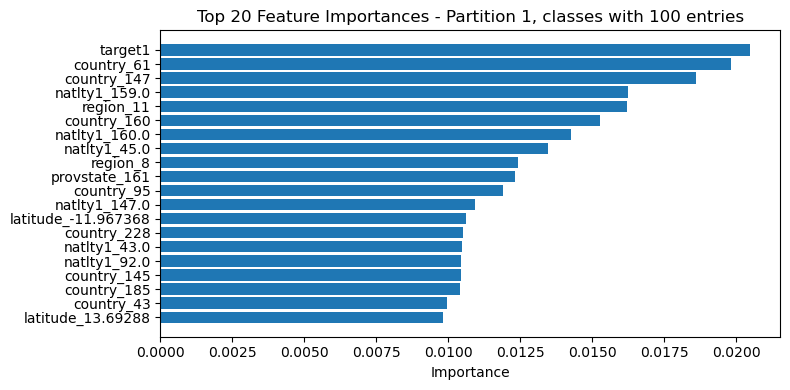

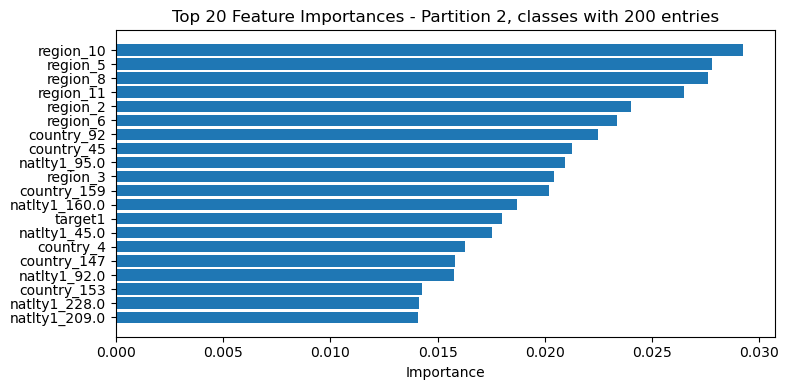

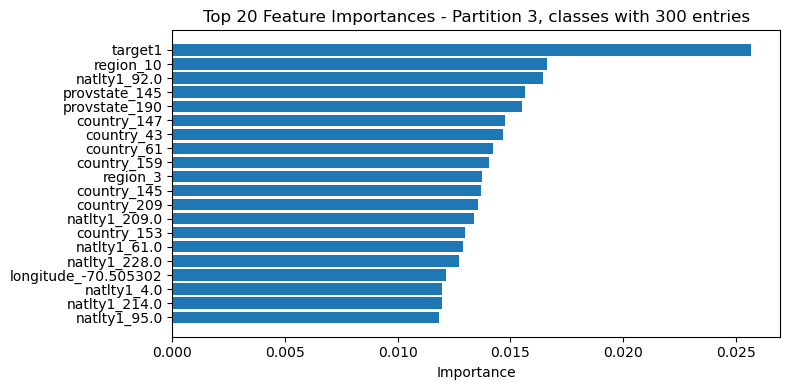

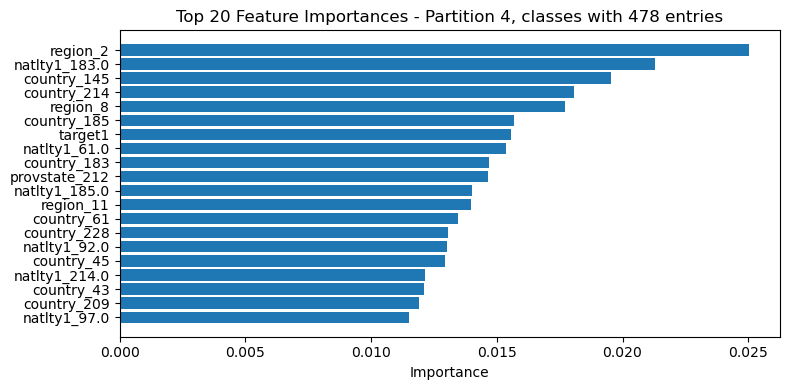

In [8]:
top_k = 20

for i, rfc in enumerate(models):
    importances = rfc.feature_importances_

    feature_names = rfc.feature_names_in_

    indices = np.argsort(importances)[::-1][:top_k]
    top_features = [feature_names[j] for j in indices]
    top_importances = importances[indices]

    plt.figure(figsize=(8, 4))
    plt.barh(top_features[::-1], top_importances[::-1])
    plt.xlabel("Importance")
    plt.title(f"Top {top_k} Feature Importances - Partition {i+1}, classes with {n[i]} entries")
    plt.tight_layout()
    plt.show()